<a href="https://colab.research.google.com/github/curlfo/neural-network-generator/blob/master/mnist_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Prepare the data

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(name="extracted_layer"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
extracted_layer (Flatten)    (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

## Train the model

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 45s 105ms/step - loss: 0.3663 - accuracy: 0.8871 - val_loss: 0.0797 - val_accuracy: 0.9792
Epoch 2/15
422/422 [==============================] - 44s 104ms/step - loss: 0.1115 - accuracy: 0.9663 - val_loss: 0.0539 - val_accuracy: 0.9855
Epoch 3/15
422/422 [==============================] - 44s 105ms/step - loss: 0.0825 - accuracy: 0.9745 - val_loss: 0.0472 - val_accuracy: 0.9867
Epoch 4/15
422/422 [==============================] - 44s 104ms/step - loss: 0.0714 - accuracy: 0.9783 - val_loss: 0.0426 - val_accuracy: 0.9888
Epoch 5/15
422/422 [==============================] - 44s 104ms/step - loss: 0.0615 - accuracy: 0.9811 - val_loss: 0.0390 - val_accuracy: 0.9898
Epoch 6/15
422/422 [==============================] - 43s 102ms/step - loss: 0.0561 - accuracy: 0.9818 - val_loss: 0.0375 - val_accuracy: 0.9897
Epoch 7/15
160/422 [==========>...................] - ETA: 26s - loss: 0.0459 - accuracy: 0.9857

## Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02647307515144348
Test accuracy: 0.9914000034332275


## Get layer output & vizualize it

In [ ]:
def get_layer_output(X, layer_name):
    layer_output = model.get_layer(layer_name).output
    intermediate_model = keras.Model(inputs=model.input, outputs=layer_output)
    intermediate_prediction = intermediate_model.predict(X)
    print('ouput shape:', np.shape(intermediate_prediction))
    return intermediate_prediction
 
    
def visualize_conv_layer(layer_out_4D):
    row_size=4
    col_size=8
    img_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(10,6))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(layer_out_4D[0, :, :, img_index], cmap='gray')
            img_index=img_index+1

ouput shape: (1, 11, 11, 64)


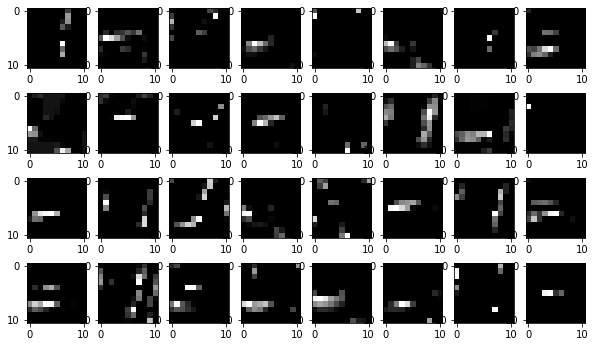

In [ ]:
conv_lay_out = get_layer_output(x_train[2].reshape(1,28,28,1), 'conv2d_1')
visualize_conv_layer(lay_out)

In [ ]:
flatten_lay_out = get_layer_output(x_train, "extracted_layer") #features of all TRAIN SET (BEVARE OF SHAPES!)

ouput shape: (60000, 1600)


## Checking the features

In [ ]:
idx = np.random.permutation(flatten_lay_out.shape[0])
                                                      
flatten_lay_out = flatten_lay_out[idx]
y_train = y_train[idx]

N = int(flatten_lay_out.shape[0]*0.8)
F_X_train = flatten_lay_out[:N]
F_y_train = y_train[:N]
F_X_val = flatten_lay_out[N:]
F_y_val = y_train[N:]
print('features train shape: ',F_X_train.shape)
print('features val shape: ',F_X_val.shape)

SMALL_N = 1000 #always use small datasets for development, and then after everything works switch to the real size!!!!
SMALL_VAL_N = 100

F_X_train_SMALL = flatten_lay_out[:SMALL_N]
F_y_train_SMALL = y_train[:SMALL_N]
F_X_val_SMALL = flatten_lay_out[:SMALL_VAL_N]
F_y_val_SMALL = y_train[:SMALL_VAL_N]
print('features train shape: ',F_X_train_SMALL.shape)
print('features val shape: ',F_X_val_SMALL.shape)

features train shape:  (48000, 1600)
features val shape:  (12000, 1600)
features train shape:  (1000, 1600)
features val shape:  (100, 1600)


In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression #JUST DO IT!
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier #JUST DO IT!
#SVC support vector machines classifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
def train_knn(X, Y): 
    tuned_parameters = [
        {
            'n_neighbors': range(1,20,1), 
        },
    ]

    grid_search = GridSearchCV(
        sklearn.neighbors.KNeighborsClassifier(),
        tuned_parameters,
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(X, Y)

    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
train_knn(F_X_train_SMALL, F_y_train_SMALL)

0.950 (+/-0.014) for {'n_neighbors': 1}
0.909 (+/-0.015) for {'n_neighbors': 2}
0.939 (+/-0.023) for {'n_neighbors': 3}
0.914 (+/-0.030) for {'n_neighbors': 4}
0.935 (+/-0.032) for {'n_neighbors': 5}
0.909 (+/-0.024) for {'n_neighbors': 6}
0.926 (+/-0.020) for {'n_neighbors': 7}
0.905 (+/-0.023) for {'n_neighbors': 8}
0.918 (+/-0.030) for {'n_neighbors': 9}
0.905 (+/-0.033) for {'n_neighbors': 10}
0.917 (+/-0.023) for {'n_neighbors': 11}
0.902 (+/-0.019) for {'n_neighbors': 12}
0.909 (+/-0.023) for {'n_neighbors': 13}
0.891 (+/-0.026) for {'n_neighbors': 14}
0.901 (+/-0.029) for {'n_neighbors': 15}
0.886 (+/-0.043) for {'n_neighbors': 16}
0.891 (+/-0.042) for {'n_neighbors': 17}
0.880 (+/-0.041) for {'n_neighbors': 18}
0.889 (+/-0.043) for {'n_neighbors': 19}
